# k近邻算法

初始化参数

In [1]:
from numpy import *
import operator
import matplotlib.pyplot as plt

def createDataSet():
	group = array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
	labels = ['A','A','B','B']
	return group,labels

K近邻算法

In [3]:
def classify0(inX,dataSet,labels,k):
	dataSetSize = dataSet.shape[0]
	diffMat = tile(inX,(dataSetSize,1)) - dataSet 	#距离计算
	sqDiffMat = diffMat ** 2
	sqDistances = sqDiffMat.sum(axis = 1)
	distances = sqDiffMat.sum(axis = 1)
	sortedDistIndicies =  distances.argsort()
	classCount = {}
	for i in range(k):
		voteIlabel = labels[sortedDistIndicies[i]] 		#选择距离最小的K个点
		classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
	sortedClassCount = sorted(classCount.items(),key = operator.itemgetter(1), reverse = True)  #排序
	return sortedClassCount[0][0]

创建数据集

In [4]:
group,labels = createDataSet()
print(classify0([0,0],group,labels,3))

B


将文本转换为Numpy

In [5]:
def file2matrix(filename):
	fr = open(filename)
	arrayOLines = fr.readlines()
	numberOfLines = len(arrayOLines)   #得到文件行数
	returnMat = zeros((numberOfLines,3))  #创建返回的Numpy矩阵
	classLabelVector = []
	index = 0
	for line in arrayOLines:
		#解析文件数据列表
		line = line.strip()
		listFromLine = line.split('\t')
		returnMat[index,:] = listFromLine[0:3]
		classLabelVector.append(int(listFromLine[-1]))
		index += 1
	return returnMat,classLabelVector

In [6]:
datingDataMat,datingLabels = file2matrix('datingTestSet2.txt')
print(datingDataMat)
print(datingLabels[0:20])

[[4.0920000e+04 8.3269760e+00 9.5395200e-01]
 [1.4488000e+04 7.1534690e+00 1.6739040e+00]
 [2.6052000e+04 1.4418710e+00 8.0512400e-01]
 ...
 [2.6575000e+04 1.0650102e+01 8.6662700e-01]
 [4.8111000e+04 9.1345280e+00 7.2804500e-01]
 [4.3757000e+04 7.8826010e+00 1.3324460e+00]]
[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3]


可视化

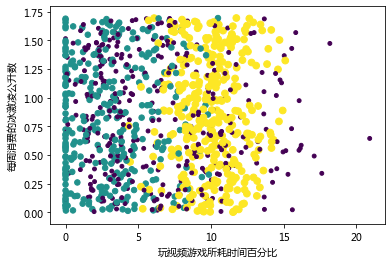

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.scatter(datingDataMat[:,1],datingDataMat[:,2])
ax.scatter(datingDataMat[:,1],datingDataMat[:,2],15.0*array(datingLabels),15.0*array(datingLabels)) #scatter图表类型散列图
plt.xlabel("玩视频游戏所耗时间百分比")
plt.ylabel("每周消费的冰激凌公升数")
plt.show()

归一化数值

In [9]:
def autoNorm(dataSet):
	minVals = dataSet.min(0)
	maxVals = dataSet.max(0)
	ranges = maxVals - minVals
	normDataSet = zeros(shape(dataSet))
	m = dataSet.shape[0]
	normDataSet = dataSet - tile(minVals,(m,1))
	normDataSet = normDataSet/tile(ranges,(m,1))
	return normDataSet,ranges,minVals

In [10]:
normMat,ranges,minVals = autoNorm(datingDataMat)
print(normMat)
print(ranges)
print(minVals)


[[0.44832535 0.39805139 0.56233353]
 [0.15873259 0.34195467 0.98724416]
 [0.28542943 0.06892523 0.47449629]
 ...
 [0.29115949 0.50910294 0.51079493]
 [0.52711097 0.43665451 0.4290048 ]
 [0.47940793 0.3768091  0.78571804]]
[9.1273000e+04 2.0919349e+01 1.6943610e+00]
[0.       0.       0.001156]


分类器测试代码

In [11]:
def datingClassTest():
	hoRatio = 0.10
	datingDataMat,datingLabels = file2matrix('datingTestSet2.txt')
	normMat,ranges,minVals = autoNorm(datingDataMat)
	m = normMat.shape[0]
	numTestVecs = int(m*hoRatio)
	errorCount = 0.0
	for i in range(numTestVecs):
		classifierResult = classify0(normMat[i,:],normMat[numTestVecs:m,:],datingLabels[numTestVecs:m],3)
		print ("the classifier came back with: {},the real answer is :{}".format(classifierResult,datingLabels[i]))
		if (classifierResult != datingLabels[i]):errorCount += 1.0
	print("the total error rate is: {:f}".format(errorCount/float(numTestVecs)))

In [12]:
print(datingClassTest())

the classifier came back with: 3,the real answer is :3
the classifier came back with: 2,the real answer is :2
the classifier came back with: 1,the real answer is :1
the classifier came back with: 1,the real answer is :1
the classifier came back with: 1,the real answer is :1
the classifier came back with: 1,the real answer is :1
the classifier came back with: 3,the real answer is :3
the classifier came back with: 3,the real answer is :3
the classifier came back with: 1,the real answer is :1
the classifier came back with: 3,the real answer is :3
the classifier came back with: 1,the real answer is :1
the classifier came back with: 1,the real answer is :1
the classifier came back with: 2,the real answer is :2
the classifier came back with: 1,the real answer is :1
the classifier came back with: 1,the real answer is :1
the classifier came back with: 1,the real answer is :1
the classifier came back with: 1,the real answer is :1
the classifier came back with: 1,the real answer is :1
the classi

In [25]:
def classifyPerson():
    resultList = ['not at  all','in small doses','in large doses']
    percentTats = float(input("percentage of time spent playing video games?"))
    ffMiles = float(input("frequent filer miles earned per year?"))
    iceCream = float(input("liters of ice cream consumed per year?"))
    datingDataMat,datingLabels = file2matrix('datingTestSet2.txt')
    normMat,ranges,minVals = autoNorm(datingDataMat)
    inArr = array([ffMiles,percentTats,iceCream])
    classifierResult = classify0((inArr-minVals)/ranges,normMat,datingLabels,3)
    print("you will probably like this person:{}".format(resultList[classifierResult - 1]))

In [28]:
classifyPerson()

percentage of time spent playing video games? 100000
frequent filer miles earned per year? 1
liters of ice cream consumed per year? 1


you will probably like this personLnot at  all
